In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## setting the start and end date
start_date = '1950-01-01'
end_date = '2023-08-14'
ticker = 'BARC.L'
## fetching data from yahoo
df = yf.download(ticker,start=start_date, end=end_date)
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1988-07-01   66.971497   66.971497   66.971497   66.971497   24.797434   
1988-07-04   66.146698   66.146698   66.146698   66.146698   24.492044   
1988-07-05   66.971497   66.971497   66.971497   66.971497   24.797434   
1988-07-06   68.456001   68.456001   68.456001   68.456001   25.347105   
1988-07-07   67.631302   67.631302   67.631302   67.631302   25.041750   
...                ...         ...         ...         ...         ...   
2023-08-07  151.119995  152.520004  149.919998  150.820007  148.085190   
2023-08-08  149.199997  150.539993  146.080002  147.080002  144.413010   
2023-08-09  149.559998  150.740005  148.759995  148.899994  146.199997   
2023-08-10  147.639999  149.279999  147.100006  148.000000  148.000000   
2023-08-11  147.320007  148.690002  146.119

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9014 entries, 1988-07-01 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9014 non-null   float64
 1   High       9014 non-null   float64
 2   Low        9014 non-null   float64
 3   Close      9014 non-null   float64
 4   Adj Close  9014 non-null   float64
 5   Volume     9014 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 493.0 KB


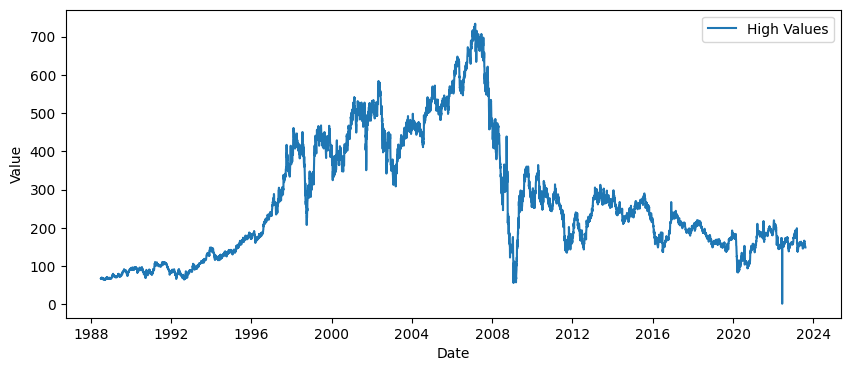

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['High'], label='High Values')
plt.legend()
plt.savefig('mishtha apple high price')
plt.show()

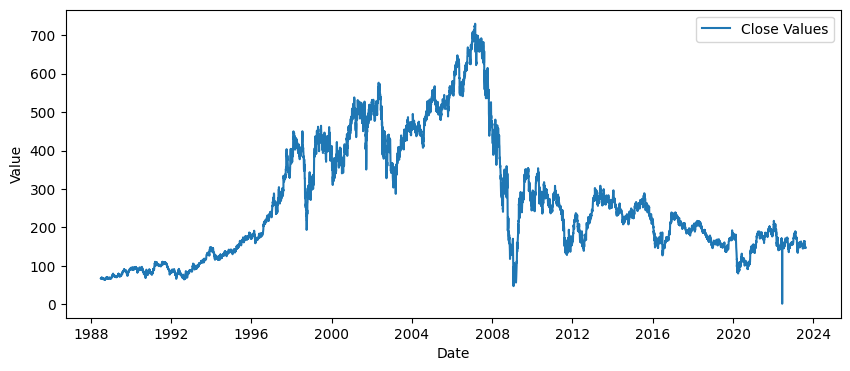

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['Close'], label='Close Values')
plt.legend()
plt.savefig('mishtha apple close price')
plt.show()

In [ ]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1988-07-01,66.971497,66.971497,66.971497,66.971497,24.797434,0
1,1988-07-04,66.146698,66.146698,66.146698,66.146698,24.492044,0
2,1988-07-05,66.971497,66.971497,66.971497,66.971497,24.797434,0
3,1988-07-06,68.456001,68.456001,68.456001,68.456001,25.347105,0
4,1988-07-07,67.631302,67.631302,67.631302,67.631302,25.041750,0
...,...,...,...,...,...,...,...
9009,2023-08-07,151.119995,152.520004,149.919998,150.820007,148.085190,40570055
9010,2023-08-08,149.199997,150.539993,146.080002,147.080002,144.413010,40910767
9011,2023-08-09,149.559998,150.740005,148.759995,148.899994,146.199997,86031726
9012,2023-08-10,147.639999,149.279999,147.100006,148.000000,148.000000,36325951


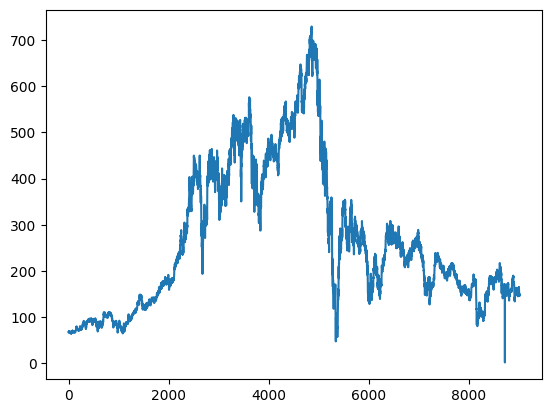

In [ ]:
plt.plot(df.Close)

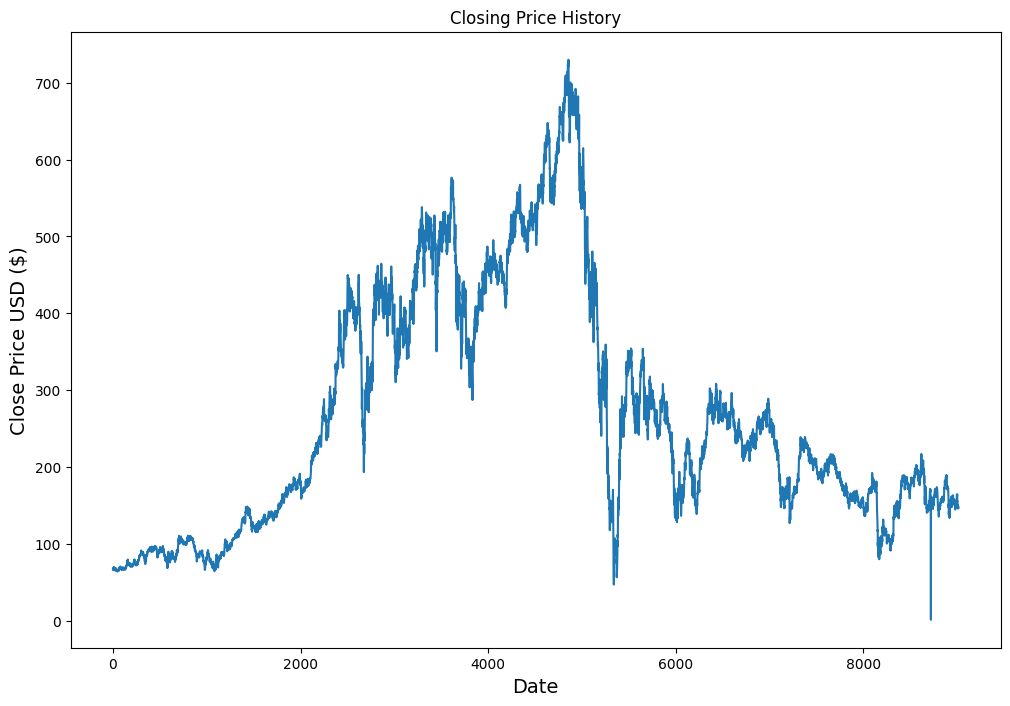

In [ ]:
#visualize the closing price history
plt.figure(figsize=(12,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

In [ ]:
import math
#create a new dataframe with only the "Close column"
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on (95%)
training = math.ceil(len(dataset)*.95)

training

8564

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Scale the data
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.08981697],
       [0.08868431],
       [0.08981697],
       ...,
       [0.20232663],
       [0.2010907 ],
       [0.19916813]])

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training, :]
#split the data into X_train and y_train data sets
X_train = []
y_train = []

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training, :]
#split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(X_train)
        print(y_train)
        print()

[array([0.08981697, 0.08868431, 0.08981697, 0.09185559, 0.09072306,
       0.09072306, 0.09072306, 0.09185559, 0.09344131, 0.09230878,
       0.09140255, 0.09185559, 0.09253522, 0.09253522, 0.0936679 ,
       0.09253522, 0.09185559, 0.09185559, 0.09072306, 0.08913735,
       0.08959039, 0.08868431, 0.08800468, 0.08845772, 0.08959039,
       0.0911761 , 0.09185559, 0.09072306, 0.09004343, 0.08913735,
       0.08913735, 0.08777823, 0.08913735, 0.09027002, 0.09049647,
       0.09140255, 0.09072306, 0.08959039, 0.09004343, 0.08868431,
       0.08732518, 0.08732518, 0.08732518, 0.08823127, 0.08641897,
       0.08777823, 0.08709859, 0.08755164, 0.08755164, 0.08664556,
       0.08664556, 0.08709859, 0.08709859, 0.08732518, 0.08732518,
       0.08664556, 0.08709859, 0.08823127, 0.08777823, 0.08709859])]
[0.08777822833374527]



In [ ]:
#convert the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

#reshape the data (MLP expects 2 dimentionals)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_train.shape

(8504, 60)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import tensorflow as tf
# Create the regressor model
regressor = Sequential()

# Add the RNN layer
#regressor.add(RNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#regressor.add(SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))


# Add the first RNN-Bidirectional LSTM layer with Dropout regularisation
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.2))

# Adding a GRU layer
#regressor.add(GRU(units=16))

# Add the second RNN-Bidirectional LSTM layer
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.3))

# Adding a GRU layer
#regressor.add(GRU(units=18))

# Add the third RNN-Bidirectional LSTM layer
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.4))

# Adding a GRU layer
#regressor.add(GRU(units=20))

# Add the fourth RNN-Bidirectional LSTM layer
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.5))



# Add the output layer
regressor.add(Dense(units=1))
regressor.add(Dense(150, activation='relu', input_dim = 60))
regressor.add(Dense(150, activation='relu'))
regressor.add(Dense(1))


# Compile the RNN
#regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 bidirectional (Bidirectiona  (None, 60, 100)          40400     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            7550      
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 100)          40400     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0

In [ ]:
#compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
history = regressor.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
266/266 [==============================] - 124s 343ms/step - loss: 0.0083
Epoch 2/10
266/266 [==============================] - 93s 350ms/step - loss: 0.0022
Epoch 3/10
266/266 [==============================] - 90s 338ms/step - loss: 0.0016
Epoch 4/10
266/266 [==============================] - 91s 344ms/step - loss: 0.0013
Epoch 5/10
266/266 [==============================] - 92s 345ms/step - loss: 0.0012
Epoch 6/10
266/266 [==============================] - 90s 340ms/step - loss: 8.9922e-04
Epoch 7/10
266/266 [==============================] - 92s 345ms/step - loss: 8.8120e-04
Epoch 8/10
266/266 [==============================] - 90s 340ms/step - loss: 7.9592e-04
Epoch 9/10
266/266 [==============================] - 92s 346ms/step - loss: 7.3007e-04
Epoch 10/10
266/266 [==============================] - 91s 341ms/step - loss: 8.0372e-04


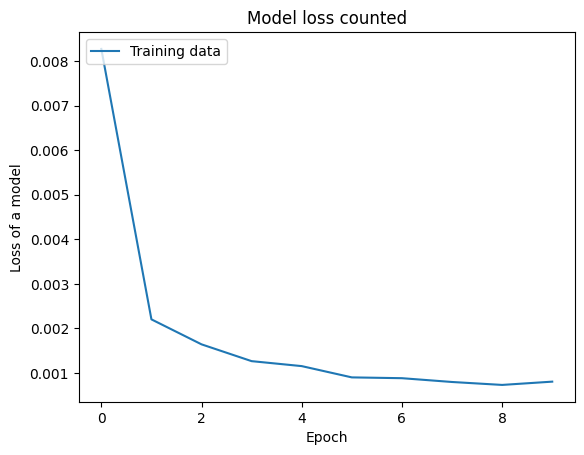

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Test data'], loc='upper left')
plt.show()

In [ ]:
#create the testing data set
#create a new array containing scaled values from index
test_data = scaled_data[training - 60: , : ]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

In [ ]:
#get the models predicted price values
predictions = regressor.predict(x_test)
predictions = scaler.inverse_transform(predictions)

15/15 [==============================] - 5s 126ms/step


In [ ]:
#get the root mean squared error (RMSE) (lower values better fit)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
print(rmse)

4.639511812527974


In [ ]:
mse = (np.mean( predictions - y_test)**2)
print(mse)

21.525069858586612


In [ ]:
from sklearn.metrics import mean_absolute_error
#get the mean absolute error (average of the forecast error values - all of em forced to be positive)
mae = mean_absolute_error(y_test, predictions)
print(mae)

6.370469454129537


In [ ]:
#define MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#get MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print(mape)

27.64321403462163


<ipython-input-27-4d2a747520e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


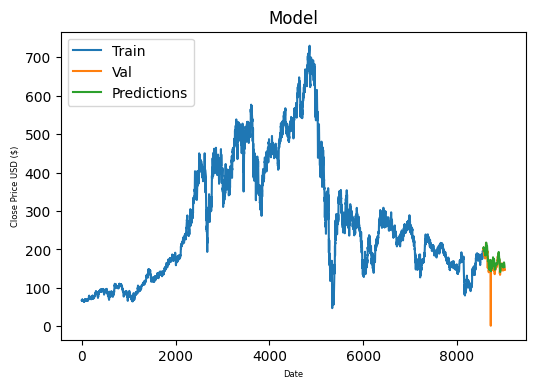

In [ ]:
#plot the data
train = data[:training]
valid = data[training:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(6,4))
plt.title('Model')
plt.xlabel('Date', fontsize = 6)
plt.ylabel('Close Price USD ($)', fontsize=6)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.savefig('mishtha bilstm rnn')
plt.show()

In [ ]:
import datetime


# Assuming 'last_date' is defined properly
# Define the number of days for the next 7 days
days_in_future = 10

import pandas as pd

# Assuming 'data_M' is a DataFrame with a 'Date' column containing dates
# Convert the last date to a pandas Timestamp object
last_date = pd.to_datetime(df['Date'].iat[-1])

# Generate the list of dates for forecast of crude oil prices for  the next 7 days
next_10_days = [last_date + datetime.timedelta(days=i) for i in range(1, days_in_future + 1)]

# Assuming 'next_7_days' and 'predicted_stock_price' are defined properly

# Print the predicted prices for the next 31 days
for date, price in zip(next_10_days[:10], predictions[:10]):
    print(f"{date.date()}: {price}")

2023-08-12: [203.45828]
2023-08-13: [204.90727]
2023-08-14: [204.68921]
2023-08-15: [204.72809]
2023-08-16: [205.241]
2023-08-17: [204.79898]
2023-08-18: [204.7686]
2023-08-19: [204.74763]
2023-08-20: [202.90817]
2023-08-21: [201.06395]


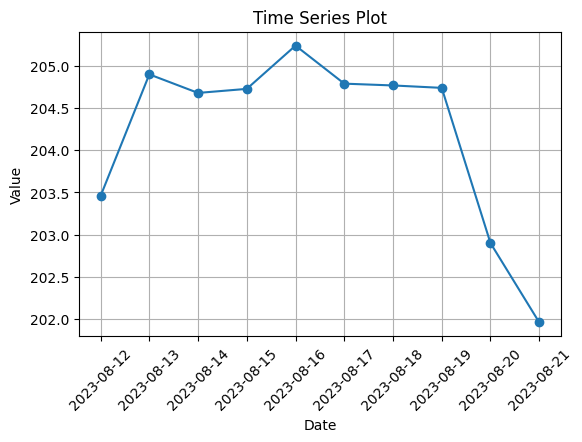

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Data
dates = [
    '2023-08-12',
    '2023-08-13',
    '2023-08-14',
    '2023-08-15',
    '2023-08-16',
    '2023-08-17',
    '2023-08-18',
    '2023-08-19',
    '2023-08-20',
    '2023-08-21'
]

values = [
    203.458,
    204.90,
    204.68,
    204.728,
    205.241,
    204.79,
    204.7686,
    204.74,
    202.90,
    201.96
]

# Convert dates to datetime objects
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

# Create a time series plot
plt.figure(figsize=(6, 4))
plt.plot(dates, values, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('mishtha forecasting')
plt.show()

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## setting the start and end date
start_date = '1950-01-01'
end_date = '2023-08-14'
ticker = 'BARC.L'
## fetching data from yahoo
df = yf.download(ticker,start=start_date, end=end_date)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1988-07-01   66.971497   66.971497   66.971497   66.971497   24.797441   
1988-07-04   66.146698   66.146698   66.146698   66.146698   24.492048   
1988-07-05   66.971497   66.971497   66.971497   66.971497   24.797441   
1988-07-06   68.456001   68.456001   68.456001   68.456001   25.347099   
1988-07-07   67.631302   67.631302   67.631302   67.631302   25.041740   
...                ...         ...         ...         ...         ...   
2023-08-07  151.119995  152.520004  149.919998  150.820007  148.085190   
2023-08-08  149.199997  150.539993  146.080002  147.080002  144.413010   
2023-08-09  149.559998  150.740005  148.759995  148.899994  146.199997   
2023-08-10  147.639999  149.279999  147.100006  148.000000  148.000000   
2023-08-11  147.320007  148.690002  146.119

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9014 entries, 1988-07-01 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9014 non-null   float64
 1   High       9014 non-null   float64
 2   Low        9014 non-null   float64
 3   Close      9014 non-null   float64
 4   Adj Close  9014 non-null   float64
 5   Volume     9014 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 493.0 KB


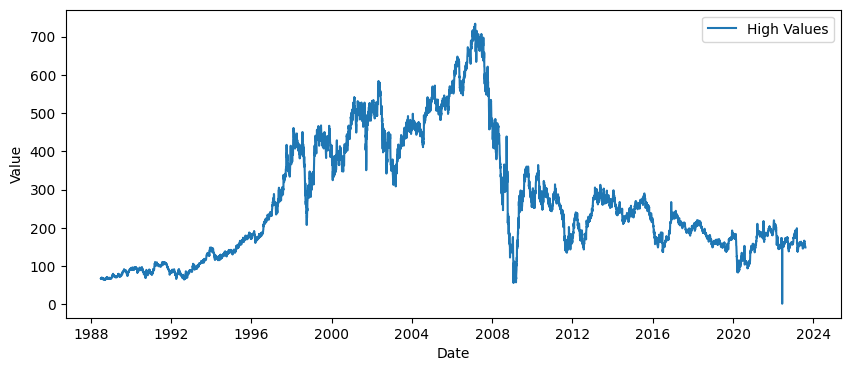

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['High'], label='High Values')
plt.legend()
plt.savefig('mishtha apple high price')
plt.show()

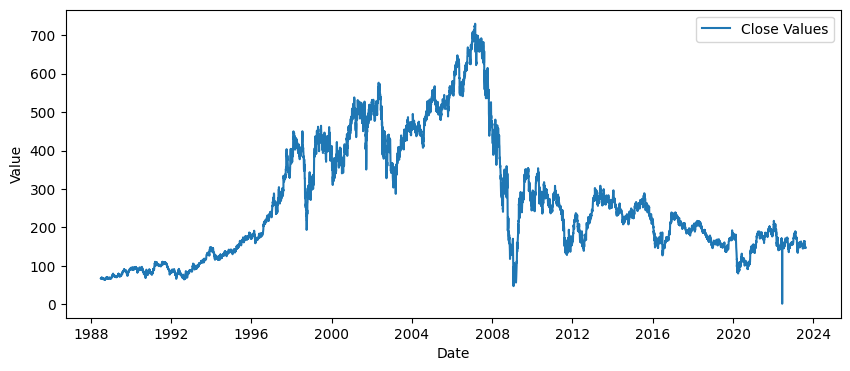

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['Close'], label='Close Values')
plt.legend()
plt.savefig('mishtha apple close price')
plt.show()

In [ ]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1988-07-01,66.971497,66.971497,66.971497,66.971497,24.797428,0
1,1988-07-04,66.146698,66.146698,66.146698,66.146698,24.492033,0
2,1988-07-05,66.971497,66.971497,66.971497,66.971497,24.797428,0
3,1988-07-06,68.456001,68.456001,68.456001,68.456001,25.347105,0
4,1988-07-07,67.631302,67.631302,67.631302,67.631302,25.041735,0
...,...,...,...,...,...,...,...
9009,2023-08-07,151.119995,152.520004,149.919998,150.820007,148.085190,40570055
9010,2023-08-08,149.199997,150.539993,146.080002,147.080002,144.413010,40910767
9011,2023-08-09,149.559998,150.740005,148.759995,148.899994,146.199997,86031726
9012,2023-08-10,147.639999,149.279999,147.100006,148.000000,148.000000,36325951


<ipython-input-16-3c852398583e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


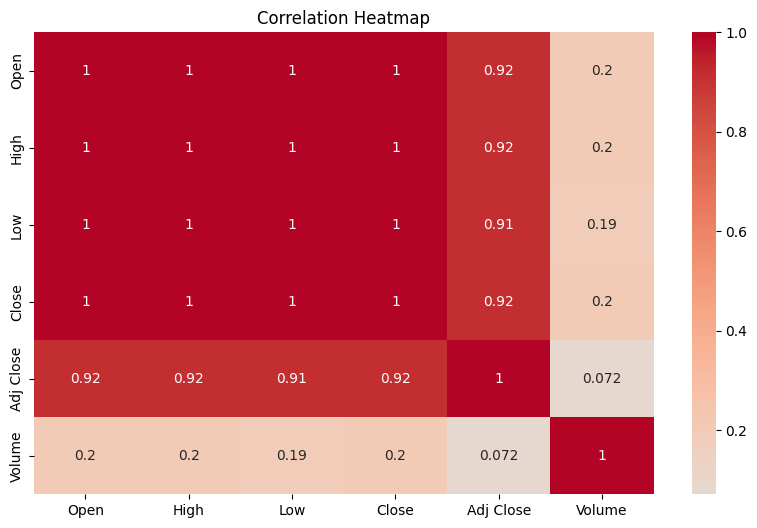

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.savefig('heatmap')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):

    #Parameters:
    # y_true (array-like): The ground truth (actual) values.
    # y_pred (array-like): The predicted values.


    return mean_absolute_error(y_true, y_pred) / np.mean(y_true) * 100

In [ ]:
from sklearn.metrics import mean_squared_error

def mean_square_error(y_true, y_pred):
   # y_true (array-like): The ground truth (actual) values.
   #  y_pred (array-like): The predicted values.



    return mean_squared_error(y_true, y_pred)

In [ ]:
import math
def root_mean_square_error(y_true, y_pred):
    RMSE_Value = math.sqrt(mean_squared_error(y_true, y_pred))
    return RMSE_Value


In [ ]:
# Define the size of the training set
train_size = int(len(df) * 0.95)  # 95% of the data for training

# Split the data into training and testing sets
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Print the shapes of the split sets
print(train.shape, test.shape)

(8563, 6) (451, 6)


In [ ]:
training_data = train.filter(['High'])
training_set = training_data.values
testing_data = test.filter(['High'])
testing_set = testing_data.values
print(training_set.shape, testing_set.shape)

(8563, 1) (451, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Scale the training dataset
scaled_training_set = scaler.fit_transform(training_set)
# Scale the test dataset using the same scaler
scaled_testing_set = scaler.transform(testing_set)

print(scaled_training_set.shape, scaled_testing_set.shape)

(8563, 1) (451, 1)


In [ ]:
step_count = 50
X_train = []
y_train = []

for i in range(len(train) - step_count):
    X_train.append(scaled_training_set[i:i + step_count, 0])
    y_train.append(scaled_training_set[step_count + i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = y_train.reshape(y_train.shape[0])

print(X_train.shape, y_train.shape)


(8513, 50) (8513,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the CNN model
cnn_model = Sequential()

# Add a 1D convolutional layer with 32 filters, kernel size 3, and ReLU activation
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer with pool size 2
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the previous layer
cnn_model.add(Flatten())

# Add a fully connected dense layer with 64 units and ReLU activation
cnn_model.add(Dense(64, activation='relu'))

# Add a final dense layer with 1 unit and linear activation for regression
cnn_model.add(Dense(1, activation='linear'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
cnn_model.summary()

#compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 64)                49216     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,409
Trainable params: 49,409
Non-trainable params: 0
____________________________________________________

In [ ]:
#train the model
history = cnn_model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
533/533 [==============================] - 2s 3ms/step - loss: 0.0013
Epoch 2/20
533/533 [==============================] - 1s 3ms/step - loss: 4.0881e-04
Epoch 3/20
533/533 [==============================] - 1s 2ms/step - loss: 3.3976e-04
Epoch 4/20
533/533 [==============================] - 1s 3ms/step - loss: 2.9571e-04
Epoch 5/20
533/533 [==============================] - 1s 3ms/step - loss: 2.5263e-04
Epoch 6/20
533/533 [==============================] - 1s 2ms/step - loss: 2.3403e-04
Epoch 7/20
533/533 [==============================] - 2s 4ms/step - loss: 2.1492e-04
Epoch 8/20
533/533 [==============================] - 2s 3ms/step - loss: 1.9808e-04
Epoch 9/20
533/533 [==============================] - 1s 3ms/step - loss: 1.9429e-04
Epoch 10/20
533/533 [==============================] - 1s 3ms/step - loss: 1.7266e-04
Epoch 11/20
533/533 [==============================] - 1s 3ms/step - loss: 1.7581e-04
Epoch 12/20
533/533 [==============================] - 1s 3ms/step 

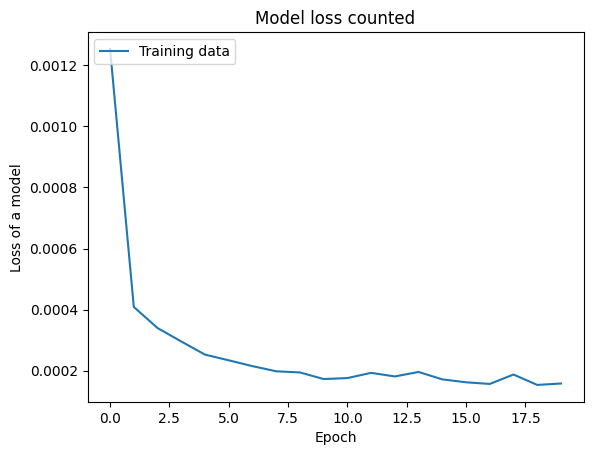

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Training data'], loc='upper left')
plt.show()

In [ ]:
X_test = []
y_test = []

for i in range(len(test) - step_count):
    X_test.append(scaled_testing_set[i:i + step_count, 0])
    y_test.append(scaled_testing_set[step_count + i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test = y_test.reshape(y_test.shape[0])

print(X_test.shape, y_test.shape)

(401, 50) (401,)


In [ ]:
#train the model
history = cnn_model.fit(X_test, y_test, batch_size=16, epochs=20)

Epoch 1/20
26/26 [==============================] - 0s 3ms/step - loss: 2.7706e-04
Epoch 2/20
26/26 [==============================] - 0s 3ms/step - loss: 2.6525e-04
Epoch 3/20
26/26 [==============================] - 0s 3ms/step - loss: 2.4187e-04
Epoch 4/20
26/26 [==============================] - 0s 3ms/step - loss: 2.2689e-04
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 2.1664e-04
Epoch 6/20
26/26 [==============================] - 0s 3ms/step - loss: 2.2909e-04
Epoch 7/20
26/26 [==============================] - 0s 3ms/step - loss: 2.0555e-04
Epoch 8/20
26/26 [==============================] - 0s 3ms/step - loss: 2.1059e-04
Epoch 9/20
26/26 [==============================] - 0s 4ms/step - loss: 2.7524e-04
Epoch 10/20
26/26 [==============================] - 0s 5ms/step - loss: 2.1883e-04
Epoch 11/20
26/26 [==============================] - 0s 4ms/step - loss: 1.9130e-04
Epoch 12/20
26/26 [==============================] - 0s 4ms/step - loss: 1.9724e-04
E

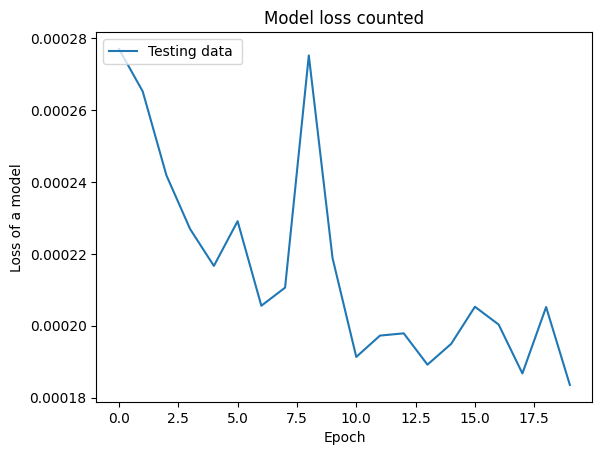

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Testing data '], loc='upper left')
plt.show()

In [ ]:
predict = cnn_model.predict(X_test)
predict_original_scale = predict * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_test_original = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

13/13 [==============================] - 0s 2ms/step


In [ ]:
y_test_original

array([201.05200195, 205.25      , 209.80000305, 209.        ,
       212.19999695, 217.19999695, 219.6000061 , 219.1000061 ,
       215.6000061 , 210.94999695, 207.80000305, 203.44500732,
       198.47999573, 197.41999817, 205.25999451, 207.80000305,
       201.66999817, 199.46000671, 201.1499939 , 206.12199402,
       209.44999695, 207.69999695, 205.19999695, 207.3999939 ,
       209.        , 209.16900635, 207.05000305, 199.90499878,
       199.8999939 , 199.30000305, 195.96000671, 193.13999939,
       195.13999939, 192.08000183, 202.3500061 , 191.06599426,
       190.27999878, 183.88000488, 185.17999268, 178.55999756,
       174.91200256, 168.16000366, 155.11999512, 161.88699341,
       164.40899658, 165.63999939, 170.80099487, 170.24000549,
       175.61000061, 178.02000427, 172.80000305, 172.17999268,
       173.52000427, 174.19999695, 171.08000183, 168.86500549,
       166.63999939, 157.3999939 , 154.69999695, 152.66000366,
       151.75999451, 150.03999329, 148.3999939 , 148.15

In [ ]:
predict_original_scale

array([[194.9152 ],
       [195.42561],
       [198.89552],
       [203.54832],
       [205.40584],
       [206.59683],
       [210.69725],
       [214.99986],
       [214.57663],
       [212.79285],
       [208.63115],
       [205.75069],
       [202.89595],
       [198.58545],
       [195.14516],
       [199.42775],
       [204.52249],
       [201.76158],
       [196.7241 ],
       [196.85133],
       [200.11667],
       [205.19049],
       [205.72144],
       [202.26741],
       [201.86845],
       [203.73247],
       [205.56862],
       [204.01765],
       [200.12518],
       [195.97183],
       [194.89314],
       [194.23952],
       [190.58302],
       [190.84982],
       [189.69258],
       [193.97919],
       [193.7711 ],
       [185.34796],
       [183.0075 ],
       [180.148  ],
       [178.93903],
       [172.47188],
       [169.00186],
       [158.2283 ],
       [157.05911],
       [159.15625],
       [162.58372],
       [163.68536],
       [167.46033],
       [168.06851],


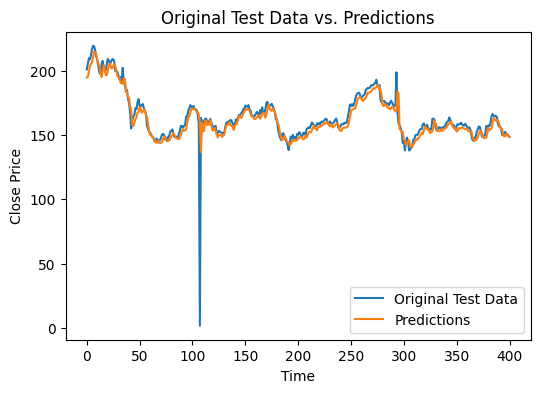

In [ ]:
plt.figure(figsize=(6, 4))

# Plot original test data
plt.plot(y_test_original, label='Original Test Data')

# Plot predicted data
plt.plot(predict_original_scale, label='Predictions')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Original Test Data vs. Predictions')
plt.legend()
plt.savefig('Mishtha test and actual prediction')
plt.show()

In [ ]:
mape = mean_absolute_percentage_error(y_test_original, predict_original_scale)
mse = mean_square_error(y_test_original, predict_original_scale)
rmse = root_mean_square_error(y_test_original, predict_original_scale)
print(' model performance')
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

 model performance
RMSE: 9.549539083235413
MSE: 91.19369670224066
MAPE: 2.1237047086545133


In [ ]:
import datetime


# Assuming 'last_date' is defined properly
# Define the number of days for the next 7 days
days_in_future = 10

import pandas as pd

# Assuming 'data_M' is a DataFrame with a 'Date' column containing dates
# Convert the last date to a pandas Timestamp object
last_date = pd.to_datetime(df['Date'].iat[-1])

# Generate the list of dates for forecast of crude oil prices for  the next 7 days
next_10_days = [last_date + datetime.timedelta(days=i) for i in range(1, days_in_future + 1)]

# Assuming 'next_7_days' and 'predicted_stock_price' are defined properly

# Print the predicted prices for the next 31 days
for date, price in zip(next_10_days[:10], predict_original_scale[:10]):
    print(f"{date.date()}: {price}")

2023-08-12: [195.07617]
2023-08-13: [196.90175]
2023-08-14: [199.94781]
2023-08-15: [204.72911]
2023-08-16: [205.35461]
2023-08-17: [206.71022]
2023-08-18: [210.70299]
2023-08-19: [214.91037]
2023-08-20: [214.27258]
2023-08-21: [211.93251]


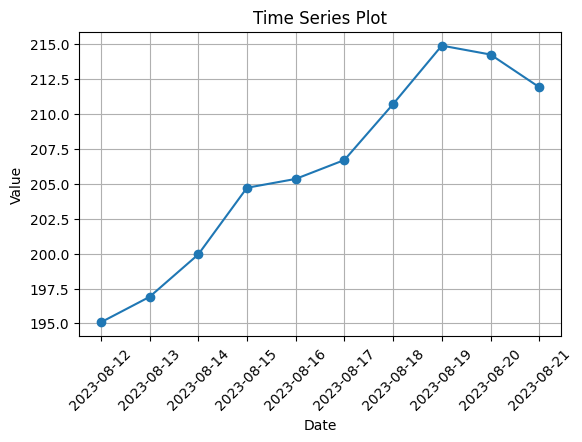

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Data
dates = [
    '2023-08-12',
    '2023-08-13',
    '2023-08-14',
    '2023-08-15',
    '2023-08-16',
    '2023-08-17',
    '2023-08-18',
    '2023-08-19',
    '2023-08-20',
    '2023-08-21'
]

values = [
    195.076,
    196.90,
    199.94,
    204.72,
    205.3546,
    206.710,
    210.72,
    214.91,
    214.27,
    211.932
]

# Convert dates to datetime objects
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

# Create a time series plot
plt.figure(figsize=(6, 4))
plt.plot(dates, values, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('mishtha forecasting')
plt.show()

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## setting the start and end date
start_date = '1950-01-01'
end_date = '2023-08-14'
ticker = 'BARC.L'
## fetching data from yahoo
df = yf.download(ticker,start=start_date, end=end_date)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1988-07-01   66.971497   66.971497   66.971497   66.971497   24.797438   
1988-07-04   66.146698   66.146698   66.146698   66.146698   24.492035   
1988-07-05   66.971497   66.971497   66.971497   66.971497   24.797438   
1988-07-06   68.456001   68.456001   68.456001   68.456001   25.347099   
1988-07-07   67.631302   67.631302   67.631302   67.631302   25.041746   
...                ...         ...         ...         ...         ...   
2023-08-07  151.119995  152.520004  149.919998  150.820007  148.085190   
2023-08-08  149.199997  150.539993  146.080002  147.080002  144.413010   
2023-08-09  149.559998  150.740005  148.759995  148.899994  146.199997   
2023-08-10  147.639999  149.279999  147.100006  148.000000  148.000000   
2023-08-11  147.320007  148.690002  146.119

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9014 entries, 1988-07-01 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9014 non-null   float64
 1   High       9014 non-null   float64
 2   Low        9014 non-null   float64
 3   Close      9014 non-null   float64
 4   Adj Close  9014 non-null   float64
 5   Volume     9014 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 493.0 KB


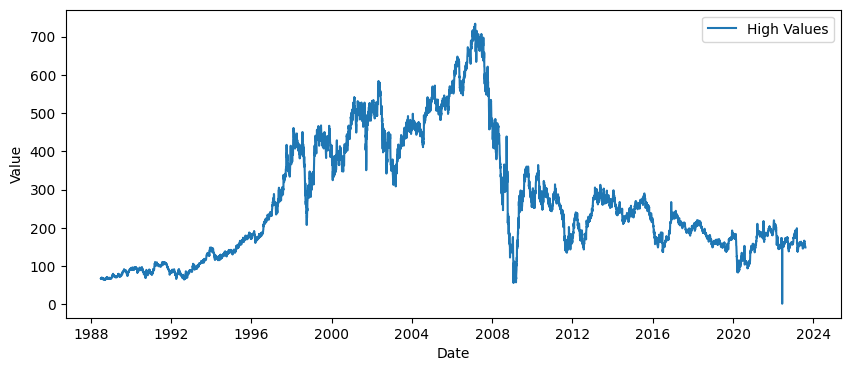

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['High'], label='High Values')
plt.legend()
plt.savefig('mishtha apple high price')
plt.show()

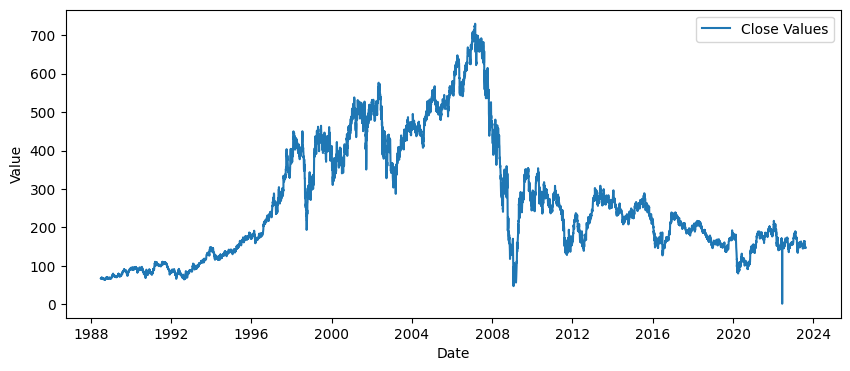

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['Close'], label='Close Values')
plt.legend()
plt.savefig('mishtha apple close price')
plt.show()

In [ ]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1988-07-01,66.971497,66.971497,66.971497,66.971497,24.797438,0
1,1988-07-04,66.146698,66.146698,66.146698,66.146698,24.492035,0
2,1988-07-05,66.971497,66.971497,66.971497,66.971497,24.797438,0
3,1988-07-06,68.456001,68.456001,68.456001,68.456001,25.347099,0
4,1988-07-07,67.631302,67.631302,67.631302,67.631302,25.041746,0
...,...,...,...,...,...,...,...
9009,2023-08-07,151.119995,152.520004,149.919998,150.820007,148.085190,40570055
9010,2023-08-08,149.199997,150.539993,146.080002,147.080002,144.413010,40910767
9011,2023-08-09,149.559998,150.740005,148.759995,148.899994,146.199997,86031726
9012,2023-08-10,147.639999,149.279999,147.100006,148.000000,148.000000,36325951


<ipython-input-43-096c9588a5d9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


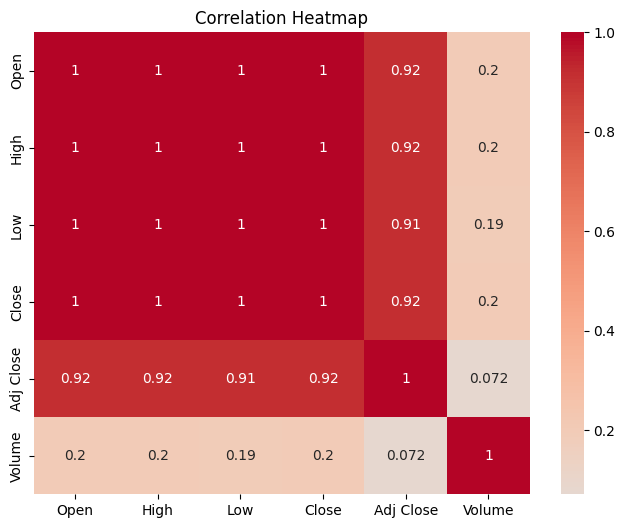

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.savefig('heatmap')
plt.show()

In [ ]:
# Define the size of the training set
train_size = int(len(df) * 0.95)  # 95% of the data for training

# Split the data into training and testing sets
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Print the shapes of the split sets
print(train.shape, test.shape)

(8563, 7) (451, 7)


In [ ]:
training_data = train.filter(['High'])
training_set = training_data.values
testing_data = test.filter(['High'])
testing_set = testing_data.values
print(training_set.shape, testing_set.shape)

(8563, 1) (451, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Scale the training dataset
scaled_training_set = scaler.fit_transform(training_set)
# Scale the test dataset using the same scaler
scaled_testing_set = scaler.transform(testing_set)

print(scaled_training_set.shape, scaled_testing_set.shape)

(8563, 1) (451, 1)


In [ ]:
step_count = 50
X_train = []
y_train = []

for i in range(len(train) - step_count):
    X_train.append(scaled_training_set[i:i + step_count, 0])
    y_train.append(scaled_training_set[step_count + i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = y_train.reshape(y_train.shape[0])

print(X_train.shape, y_train.shape)

(8513, 50) (8513,)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

length = 50  # Number of time steps in the input sequence
n_features = 1  # Number of features at each time step

model = Sequential()

# Add a Simple RNN layer with 30 units and input shape (length, n_features)
model.add(SimpleRNN(30, input_shape=(length, n_features)))

# Add a Dropout layer with dropout rate 0.2
model.add(Dropout(rate=0.2))

# Add a Dense output layer with 1 unit (for regression)
model.add(Dense(1))

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history = model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
533/533 [==============================] - 7s 10ms/step - loss: 0.0074
Epoch 2/20
533/533 [==============================] - 4s 8ms/step - loss: 0.0022
Epoch 3/20
533/533 [==============================] - 5s 9ms/step - loss: 0.0016
Epoch 4/20
533/533 [==============================] - 5s 9ms/step - loss: 0.0013
Epoch 5/20
533/533 [==============================] - 4s 8ms/step - loss: 0.0011
Epoch 6/20
533/533 [==============================] - 5s 9ms/step - loss: 9.1789e-04
Epoch 7/20
533/533 [==============================] - 5s 10ms/step - loss: 8.6102e-04
Epoch 8/20
533/533 [==============================] - 4s 8ms/step - loss: 8.1292e-04
Epoch 9/20
533/533 [==============================] - 5s 10ms/step - loss: 7.3289e-04
Epoch 10/20
533/533 [==============================] - 4s 7ms/step - loss: 7.2975e-04
Epoch 11/20
533/533 [==============================] - 4s 8ms/step - loss: 6.8180e-04
Epoch 12/20
533/533 [==============================] - 5s 10ms/step - loss: 6.61

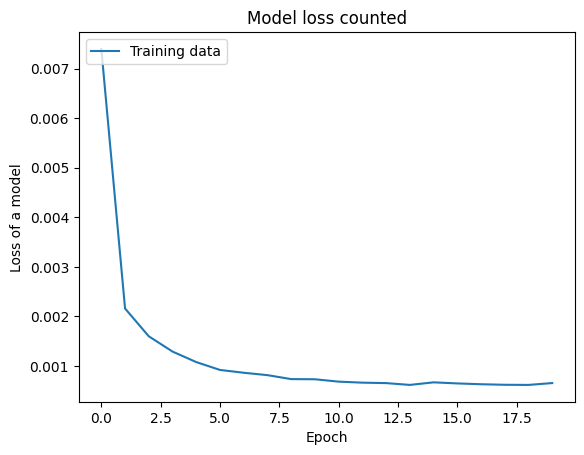

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Training data'], loc='upper left')
plt.show()

In [ ]:
X_test = []
y_test = []

for i in range(len(test) - step_count):
    X_test.append(scaled_testing_set[i:i + step_count, 0])
    y_test.append(scaled_testing_set[step_count + i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test = y_test.reshape(y_test.shape[0])

print(X_test.shape, y_test.shape)

(401, 50) (401,)


In [ ]:
#train the model
history = model.fit(X_test, y_test, batch_size=16, epochs=20)

Epoch 1/20
26/26 [==============================] - 0s 8ms/step - loss: 5.8159e-04
Epoch 2/20
26/26 [==============================] - 0s 8ms/step - loss: 6.6977e-04
Epoch 3/20
26/26 [==============================] - 0s 9ms/step - loss: 5.7879e-04
Epoch 4/20
26/26 [==============================] - 0s 9ms/step - loss: 5.3657e-04
Epoch 5/20
26/26 [==============================] - 0s 8ms/step - loss: 4.9383e-04
Epoch 6/20
26/26 [==============================] - 0s 8ms/step - loss: 6.1207e-04
Epoch 7/20
26/26 [==============================] - 0s 8ms/step - loss: 5.3254e-04
Epoch 8/20
26/26 [==============================] - 0s 7ms/step - loss: 4.8766e-04
Epoch 9/20
26/26 [==============================] - 0s 8ms/step - loss: 3.8758e-04
Epoch 10/20
26/26 [==============================] - 0s 7ms/step - loss: 4.6019e-04
Epoch 11/20
26/26 [==============================] - 0s 7ms/step - loss: 4.9018e-04
Epoch 12/20
26/26 [==============================] - 0s 8ms/step - loss: 4.0564e-04
E

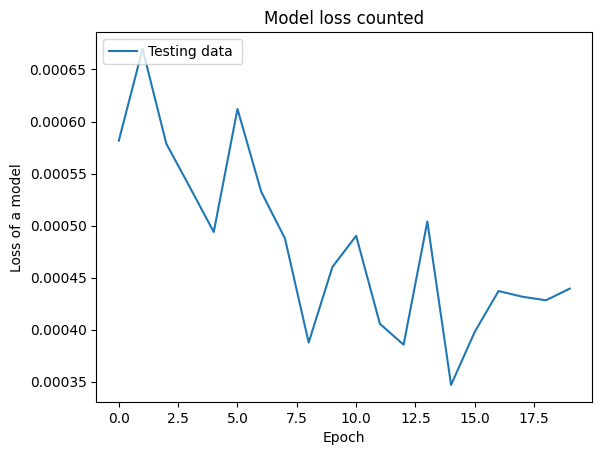

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Testing data '], loc='upper left')
plt.show()

In [ ]:
predict = model.predict(X_test)
predict_original_scale = predict * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_test_original = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

13/13 [==============================] - 0s 5ms/step


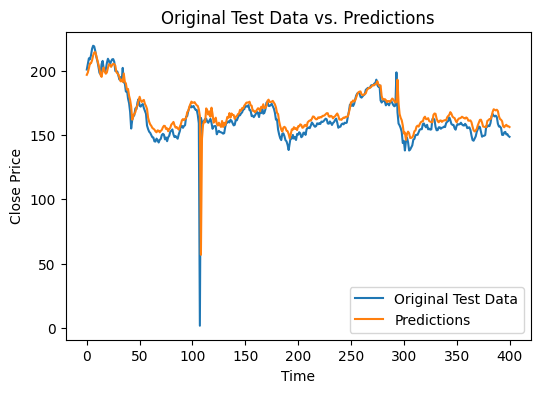

In [ ]:
plt.figure(figsize=(6, 4))

# Plot original test data
plt.plot(y_test_original, label='Original Test Data')

# Plot predicted data
plt.plot(predict_original_scale, label='Predictions')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Original Test Data vs. Predictions')
plt.legend()
plt.savefig('Mishtha test and actual prediction')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - predict_original_scale) / y_test_original)) * 100

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, predict_original_scale)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print('Testing phase model performance')
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)


Testing phase model performance
RMSE: 11.43967068407161
MSE: 130.8660653600074
MAPE: 36.41116744302653


In [ ]:
import datetime


# Assuming 'last_date' is defined properly
# Define the number of days for the next 7 days
days_in_future = 10

import pandas as pd

# Assuming 'data_M' is a DataFrame with a 'Date' column containing dates
# Convert the last date to a pandas Timestamp object
last_date = pd.to_datetime(df['Date'].iat[-1])

# Generate the list of dates for forecast of crude oil prices for  the next 7 days
next_10_days = [last_date + datetime.timedelta(days=i) for i in range(1, days_in_future + 1)]

# Assuming 'next_7_days' and 'predicted_stock_price' are defined properly

# Print the predicted prices for the next 31 days
for date, price in zip(next_10_days[:10], predict_original_scale[:10]):
    print(f"{date.date()}: {price}")


2023-08-12: [200.56409]
2023-08-13: [201.75525]
2023-08-14: [205.6969]
2023-08-15: [210.01259]
2023-08-16: [209.55125]
2023-08-17: [211.94244]
2023-08-18: [216.79851]
2023-08-19: [219.17189]
2023-08-20: [218.10524]
2023-08-21: [214.36308]


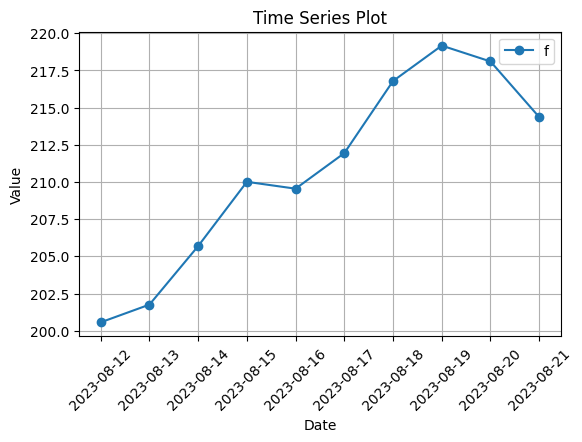

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Data
dates = [
    '2023-08-12',
    '2023-08-13',
    '2023-08-14',
    '2023-08-15',
    '2023-08-16',
    '2023-08-17',
    '2023-08-18',
    '2023-08-19',
    '2023-08-20',
    '2023-08-21'
]

values = [
    200.564,
    201.755,
    205.69,
    210.012,
    209.551,
    211.94244,
    216.79,
    219.171,
    218.105,
    214.363
]
# Convert dates to datetime objects
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

# Create a time series plot
plt.figure(figsize=(6, 4))
plt.plot(dates, values, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.legend('forecasting of apple stock')
plt.savefig('mishtha forecasting')
plt.show()